<a href="https://colab.research.google.com/github/AibulatKhusnut/DataSciense/blob/main/%D0%A5%D1%83%D1%81%D0%BD%D1%83%D1%82%D0%B4%D0%B8%D0%BD%D0%BE%D0%B2%D0%90_%D0%90_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Тестовое задание
================

## SQL

В *SQLite* файле `issues.db` находится таблица `history`.

Таблица содержит следующие колонки:
* `issue_key` – уникальный ключ задачи
* `status` – статус задачи
* `minutes_in_status` – количество минут, которое задача находилась в статусе
* `previous_status` – предыдущий статус задачи
* `status_begin` – время перехода задачи в текущий статус
* `status_end` – время окончания нахождения задачи в текущем статусе

Время `status_begin` и `ended_at` указаны в формате unix epoch в *миллисекундах*.

### Задача 1

Напишите SQL запрос, который для всех задач, открытых на момент времени `T`, выведет:
* ключ задачи
* время создания задачи
* статус на момент `T`

Задача считается открытой на момент времени `T`, если к этому времени последний статус задачи был любой кроме `Closed` и `Resolved`.

Оформите запрос таким образом, чтобы, изменив дату, его можно было использовать для поиска открытых задач в любой момент времени как в прошлом, так и в настоящем.

Здесь и далее все даты и времена должны быть переведены в удобочитаемый вид.

In [8]:
import sqlite3
path='/content/task_history.csv'
conn=sqlite3.connect(path)

In [115]:
#я так понял нужно вывести время в статусе open?верно? в этом стообце время создания задачи
path='/content/issues.db'
conn = sqlite3.connect(path)
cursor = conn.cursor()
#меняете год месяц и дату и выполняете код, можно добавить часы минуты.
Years = '2021'
Month = '01'
Day = '15'
sql  = f"SELECT distinct  h.issue_key, t.creation_time_open, t3.status from history  h join (select h1.issue_key, strftime('%Y-%m-%d %H:%M:%S', datetime(h1.status_begin/1000, 'unixepoch')) AS creation_time_open from history as h1 where status =='Open') as t on t.issue_key = h.issue_key join (select h2.issue_key, h2.status, strftime('%Y-%m-%d %H:%M:%S', datetime(h2.status_begin/1000, 'unixepoch')) AS creation_time2 from history as h2 where strftime('%Y', creation_time2) = '{Years}' and strftime('%m', creation_time2) = '{Month}'  and strftime('%d', creation_time2) = '{Day}') as t3 on t3.issue_key = h.issue_key where h.status NOT IN ('Closed', 'Resolved')"

cursor.execute(sql)

for i in cursor:
    print(i)

cursor.close()
conn.close()

('A-29514', '2021-01-12 16:49:15', 'Closed')
('A-29354', '2020-12-28 12:59:00', 'In Progress')
('A-29354', '2020-12-28 12:59:00', 'Waiting for integration')
('A-29354', '2021-01-12 11:55:20', 'In Progress')
('A-29354', '2021-01-12 11:55:20', 'Waiting for integration')
('A-29354', '2021-01-14 18:32:11', 'In Progress')
('A-29354', '2021-01-14 18:32:11', 'Waiting for integration')
('A-29353', '2020-12-28 12:57:04', 'In Owl')
('A-29353', '2020-12-28 12:57:04', 'In Testing')
('A-29353', '2020-12-30 13:34:48', 'In Owl')
('A-29353', '2020-12-30 13:34:48', 'In Testing')
('A-28918', '2020-12-15 15:13:42', 'Closed')
('A-28918', '2020-12-21 17:20:39', 'Closed')
('A-27821', '2020-10-30 11:33:50', 'In Review')
('D-2244', '2021-01-15 16:16:26', 'Open')
('D-2244', '2021-04-09 13:39:42', 'Open')
('D-1709', '2021-01-15 11:11:00', 'Open')
('D-1709', '2021-03-09 07:30:55', 'Open')
('D-1709', '2021-05-25 09:42:07', 'Open')


## Pandas

Файл `task_history.csv` содержит исторические данные системы сборки (e.g. *jenkins*, *teamcity*, etc.)

Каждая запись в истории описывает отдельный запуск задачи `build_name` на рабочей машине `worker`.<br/>
Для любого запуска известны автор `author` и проект `project`, в рамках которого был запущен расчет данной задачи.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [134]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/task_history.csv")
df.head(15)


,task_id,start_time,finish_time,status,worker,build_name,author,project
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary
3,44977,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary
4,44979,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary
5,44980,2005-06-26 09:15:52.639,2005-06-26 09:18:45.260,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary
6,44981,2005-06-26 09:19:06.473,2005-06-26 09:23:38.856,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary
7,44983,2005-06-26 09:24:16.644,2005-06-26 09:25:35.684,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary
8,44985,2005-06-26 09:25:35.965,2005-06-26 09:25:38.500,success,worker_05,test_cyan_texture,Kenny Smith,Halo Anniversary
9,44987,2005-06-26 09:25:59.802,2005-06-26 09:26:00.724,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary


In [135]:
df.dtypes

task_id         int64
start_time     object
finish_time    object
status         object
worker         object
build_name     object
author         object
project        object
dtype: object

### Задача 2

Для каждой недели распечатайте топ-3 пользователей, потребивших наибольшее количество машиночасов (количество часов, затраченных машиной на обработку задачи).

Выведите для данных пользователей процент потребленных ресурсов от общего объема расчетов за эту неделю.

In [136]:
df['finish_time'] = pd.to_datetime(df['finish_time'])
df['start_time'] = pd.to_datetime(df['start_time'])


In [141]:
df['start_time_sec'] = df['start_time'].astype(int) / 1e6
df['finish_time_sec'] = df['finish_time'].astype(int) / 1e6


In [143]:
df['full_time'] = df['finish_time_sec']- df['start_time_sec']
df['week'] = df['finish_time'].dt.week
df.head(10)

<ipython-input-143-8596d32366f0>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['finish_time'].dt.week


,task_id,start_time,finish_time,status,worker,build_name,author,project,start_time_sec,finish_time_sec,full_time,week
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary,1.119777e+12,1.119777e+12,281.0,25
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary,1.119777e+12,1.119777e+12,297.0,25
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,1.119777e+12,1.119777e+12,13856.0,25
3,44977,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,1.119777e+12,1.119777e+12,265461.0,25
4,44979,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary,1.119777e+12,1.119777e+12,149058.0,25
5,44980,2005-06-26 09:15:52.639,2005-06-26 09:18:45.260,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary,1.119777e+12,1.119778e+12,172621.0,25
6,44981,2005-06-26 09:19:06.473,2005-06-26 09:23:38.856,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary,1.119778e+12,1.119778e+12,272383.0,25
7,44983,2005-06-26 09:24:16.644,2005-06-26 09:25:35.684,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary,1.119778e+12,1.119778e+12,79040.0,25
8,44985,2005-06-26 09:25:35.965,2005-06-26 09:25:38.500,success,worker_05,test_cyan_texture,Kenny Smith,Halo Anniversary,1.119778e+12,1.119778e+12,2535.0,25
9,44987,2005-06-26 09:25:59.802,2005-06-26 09:26:00.724,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary,1.119778e+12,1.119778e+12,922.0,25


In [148]:
grouped = df.groupby(['week', 'worker'])['full_time'].sum().reset_index()
top3 = grouped.groupby('week').apply(lambda x: x.nlargest(3, 'full_time')).reset_index(drop=True)
top3['percent'] = top3.groupby('week')['full_time'].apply(lambda x: round(x / x.sum() * 100, 2))
top3

<ipython-input-148-6d1198287ae4>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  top3['percent'] = top3.groupby('week')['full_time'].apply(lambda x: round(x / x.sum() * 100, 2))


,week,worker,full_time,percent
0,25,worker_51,488774312.0,33.64
1,25,worker_1d,483919975.0,33.30
2,25,worker_46,480470377.0,33.06
3,26,worker_12,557831229.0,33.75
4,26,worker_4b,552191408.0,33.41
5,26,worker_11,542848633.0,32.84
6,27,worker_51,459041097.0,33.88
7,27,worker_6c,457455355.0,33.76
8,27,worker_0d,438483856.0,32.36
9,28,worker_0d,396111383.0,34.17


### Задача 3

Отобразите график с ежедневным потреблением машинного времени каждым проектом.

Для визуализации можно использовать следующие библиотеки: `matplotlib`, `seaborn` или `altair`.

In [156]:
df['Year'] = df['finish_time'].dt.year
df['Month'] = df['finish_time'].dt.month
df['Day'] = df['finish_time'].dt.day

In [157]:
import matplotlib.pyplot as plt
daily_usage = df.groupby(['Year','Month', 'Day' , 'project'])['full_time'].sum().reset_index()
daily_usage

,Year,Month,Day,project,full_time
0,2005,6,20,Halo Anniversary,9.806438e+07
1,2005,6,20,Mud Runner,7.024088e+08
2,2005,6,20,Quake Champions,2.788851e+08
3,2005,6,20,Timeshift,1.331449e+09
4,2005,6,20,World War Z,5.095657e+08
...,...,...,...,...,...
140,2005,7,18,Halo Anniversary,1.230021e+07
141,2005,7,18,Mud Runner,4.156693e+07
142,2005,7,18,Quake Champions,8.765880e+05
143,2005,7,18,Timeshift,8.847577e+07


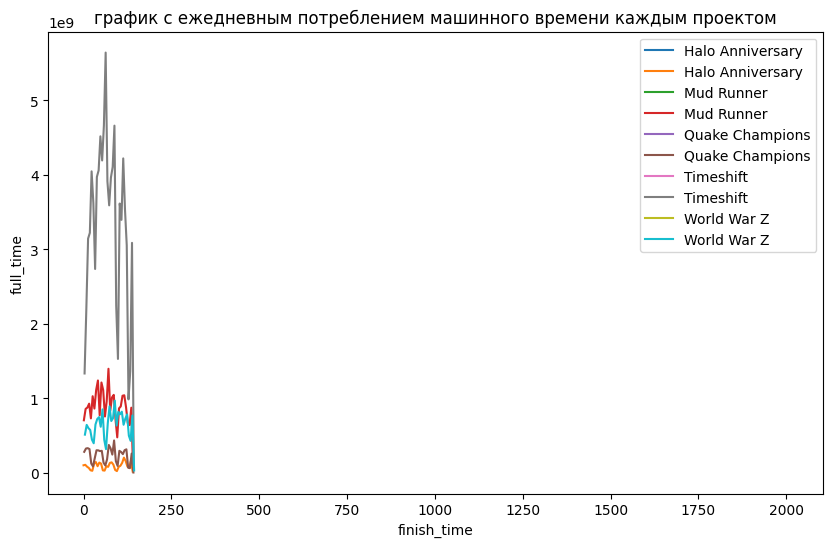

In [165]:
plt.figure(figsize=(10, 6))
for project in daily_usage['project'].unique():
    project_data = daily_usage[daily_usage['project'] == project]
    plt.plot(project_data[ 'Year'],project_data[ 'Month'] , project_data['full_time'], label=project)



plt.xlabel('finish_time')
plt.ylabel('full_time')
plt.title('график с ежедневным потреблением машинного времени каждым проектом')
plt.legend()

plt.show()

### Задача 4

Рассмотрим *еженедельное* общее потребление ресурсов. На второй неделе можно заметить всплеск нагрузки с ее последующим планомерным снижением.

Проанализируйте предоставленные данные и найдите, с чем связано подобное поведение.

In [171]:
weekly_usage  = df.groupby(['week', 'project'])['full_time'].sum().reset_index()

In [172]:
weekly_usage

,week,project,full_time
0,25,Halo Anniversary,5.195754e+08
1,25,Mud Runner,5.971363e+09
2,25,Quake Champions,1.645082e+09
3,25,Timeshift,2.029581e+10
4,25,World War Z,3.801712e+09
5,26,Halo Anniversary,6.235636e+08
6,26,Mud Runner,7.147954e+09
7,26,Quake Champions,1.585550e+09
8,26,Timeshift,3.096205e+10
9,26,World War Z,4.344194e+09
